<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [113]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Для красивых графиков в VS Code для тёмной темы 
import seaborn as sns
sns.set()

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [115]:
data = pd.read_csv('./train.csv')

In [116]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [117]:
# Случайные 7 строчек из датасета
data.sample(n=7)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3560,35,24.30,821.6,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2087,69,20.15,1337.5,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2353,24,20.15,456.85,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
2598,26,61.55,1581.95,Male,0,No,No,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Electronic check,0
674,33,95.00,3008.15,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),0
3220,1,91.30,91.3,Female,1,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
957,21,71.05,1524.85,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [118]:
# Вычислим количество NAN'ов в каждом столбце:
print(data.isna().sum())
# И суммарное количество NAN'ов
print(30 * "-", "\nTotal: ", data.isna().sum().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
------------------------------ 
Total:  0


In [119]:
# В столбце TotalSpent значения имеют тип данных Object
# заменим их на float
# Но, т.к. в датасете есть пустые значения " ", конвертируем в строку, после чего заменим пропуски на 0
data["TotalSpent"] = data['TotalSpent'].astype("str").replace(' ', 0).astype(float)
data["TotalSpent"].dtypes

dtype('float64')

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

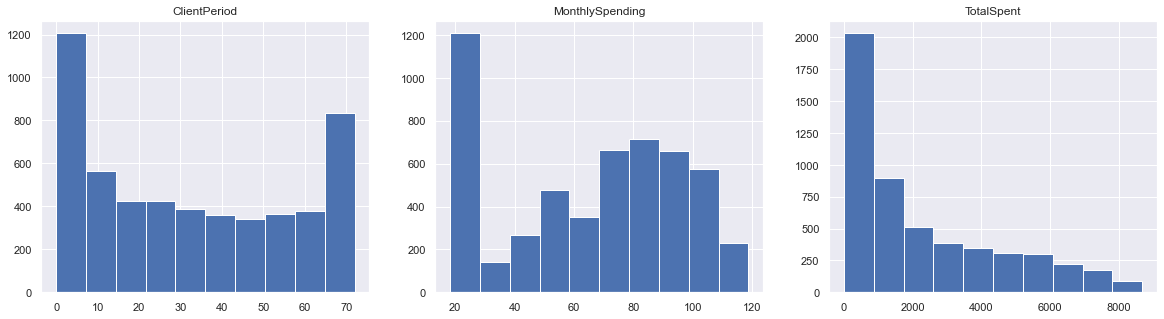

In [120]:
# Распределение численных признаков
fig = plt.figure(figsize=(20, 5))
axs = fig.subplots(1, 3)

for ind, feature in enumerate(num_cols):
    axs[ind].hist(data[feature])
    axs[ind].set_title(feature)

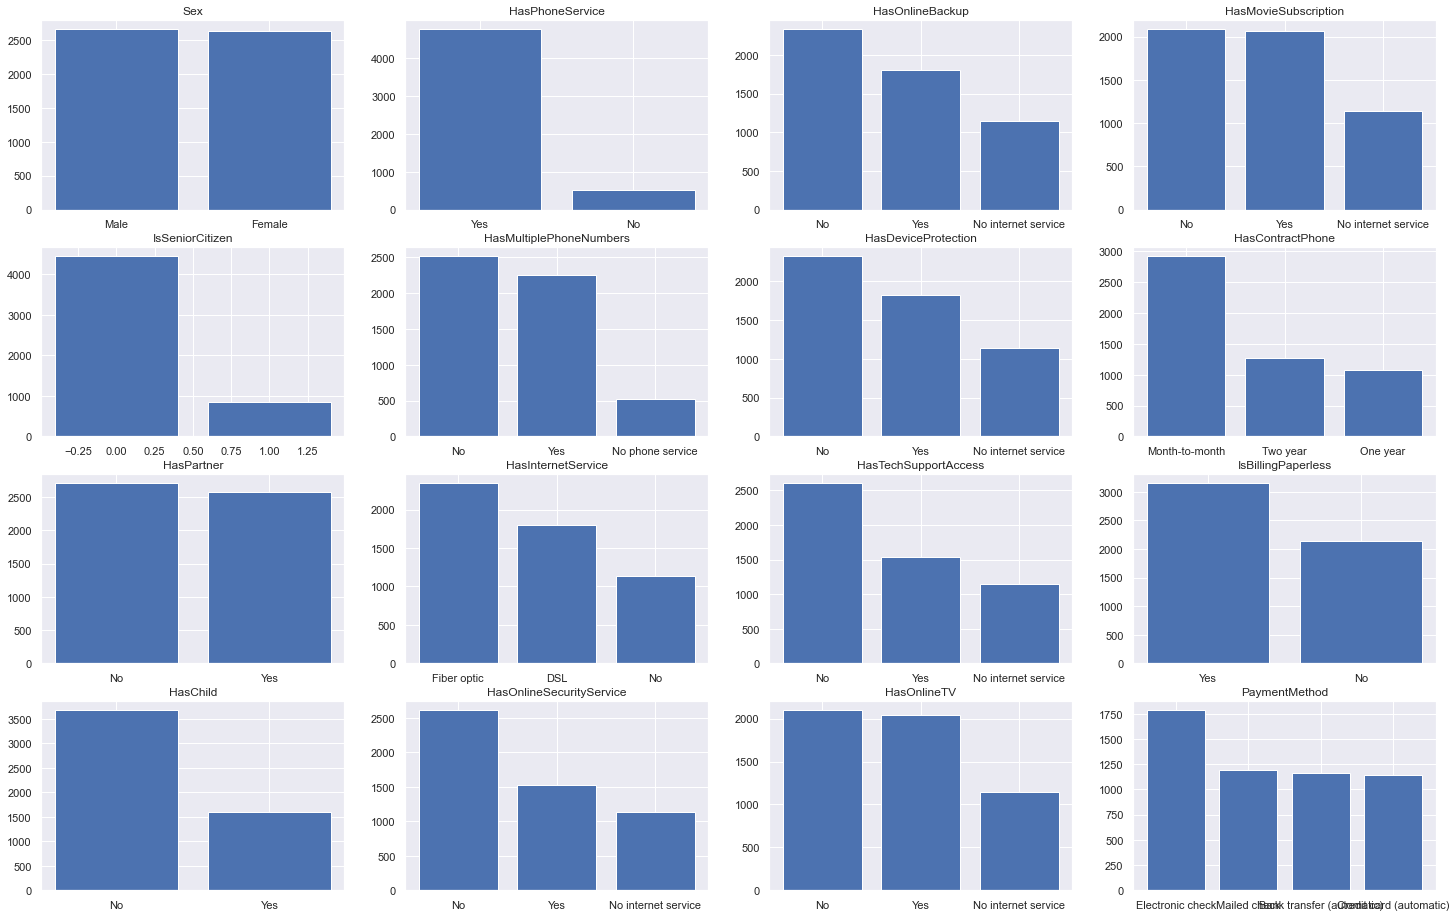

In [121]:
# Распределение категориальных признаков
fig = plt.figure(figsize=(25, 16))
axs = fig.subplots(4, 4)
x, y = 0, 0

for ind, col in enumerate(cat_cols):
    x = ind % 4
    y = ind // 4
    cat_data = data[col].value_counts()
    key = cat_data.keys()
    val = cat_data.values
    axs[x, y].bar(key, val)
    axs[x, y].set_title(col)

plt.show()


0    3898
1    1384
Name: Churn, dtype: int64


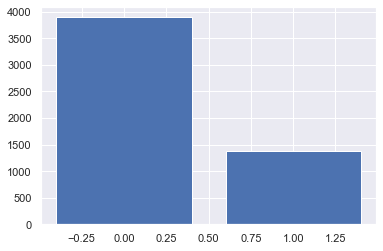

In [122]:
# Распределение целевой переменной
target_data_graph = data[target_col].value_counts()
print(target_data_graph)
plt.bar(target_data_graph.keys(), target_data_graph.values)
plt.show()

Из полученного графика видно, что количество элементов нулевого класса в 2.8 раз больше, чем первого. Следовательно, классы являются слабо сбалансированными

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [123]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [124]:
# Применяем One-Hot-Encoding, удаляем первый столбец, т к если 
# n неодинаковых признаков в столбце, то
# нам достаточно n-1 столбцов для кодирования

# Нормировка данных
X = data.drop(columns=target_col, inplace=False)
# print(X)
y = data[target_col]


X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(X.shape)
X.head(6)

(5282, 30)


,ClientPeriod,MonthlySpending,TotalSpent,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,1,0,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.90,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570.00,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0
5,25,19.80,475.20,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0


In [125]:
# # Нормировка данных
# X = data.drop(columns=target_col, inplace=False)
# # print(X)
# y = data[target_col]

pca = StandardScaler()
X = pca.fit_transform(X)

In [126]:
# Разделяем выборку на трейн/тест части 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [127]:
# обучаем модель с разными параметрами C
log_reg_gscv = GridSearchCV(LogisticRegression(), 
                               [{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
                               cv=5,
                               n_jobs=8)
log_reg_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01, 0.001]}])

In [128]:
# Наилучшее качетсво достигается при С = 100
print(log_reg_gscv.best_params_)

{'C': 100}


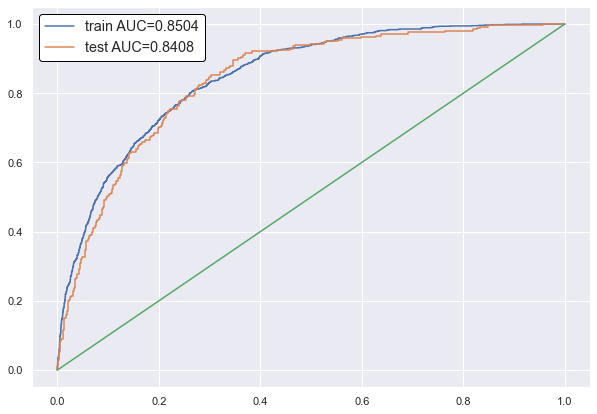

In [129]:
# Строим ROC-AUC кривую, чтобы оценить качетсво модели
y_train_pred = log_reg_gscv.predict_proba(X_train)[:, 1]
y_test_pred = log_reg_gscv.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

По метрике ROC-AUC лучшее качетсо, которого удалось достичь: 0.8634. С параметром "С"=100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [130]:
from catboost import CatBoostClassifier

In [131]:
# Загружаем данные заново и чистим (TotalSpent в некоторых строках принимает значение " ",
# из-за чего не получается обучить модель)
data = pd.read_csv('./train.csv')

data["TotalSpent"] = data['TotalSpent'].astype("str").replace(' ', "0")
# data["TotalSpent"].dtypes

X = data.drop(columns=target_col, inplace=False)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
# Обучаем модель
clf = CatBoostClassifier(
    iterations=30, 
    learning_rate=0.1, 
    custom_loss=['AUC']
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=cat_cols, 
        eval_set=(X_test, y_test), 
        verbose=False,
        plot=True
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 30, 'learning_rate': 0.1, 'custom_loss': ['AUC']}


Лучшее качетсво модели: 0.8412 по метрике ROC-AUC

# Предсказания

In [133]:
best_model = log_reg_gscv

In [135]:
# Обработка данных, с которыми работает модель
X_test = pd.read_csv('./test.csv')

X_test["TotalSpent"] = X_test['TotalSpent'].astype("str").replace(' ', 0).astype(float)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
pca = StandardScaler()
X_test = pca.fit_transform(X_test)

submission = pd.read_csv('./submission.csv')
submission['Churn'] = 1 - best_model.predict_proba(X_test)
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.